In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 3149 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Tomato_Early_blight': 0, 'Tomato_Late_blight': 1, 'Tomato_healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.6862745  0.68235296 0.7019608 ]
  [0.6862745  0.68235296 0.7019608 ]
  [0.6862745  0.68235296 0.7019608 ]
  ...
  [0.68457556 0.67281085 0.70026183]
  [0.6884803  0.6767156  0.7041666 ]
  [0.6901961  0.6784314  0.7058824 ]]

 [[0.6827755  0.6788539  0.6984618 ]
  [0.6835018  0.6795802  0.69918805]
  [0.68422794 0.6803064  0.6999142 ]
  ...
  [0.68493867 0.67317396 0.70062494]
  [0.6888434  0.6770787  0.7045297 ]
  [0.6901961  0.6784314  0.7058824 ]]

 [[0.67669874 0.6727772  0.692385  ]
  [0.67706186 0.6731403  0.6927481 ]
  [0.67742497 0.6735034  0.69311124]
  ...
  [0.68530184 0.67353714 0.7009881 ]
  [0.68920654 0.6774418  0.7048928 ]
  [0.6901961  0.6784314  0.7058824 ]]

 ...

 [[0.42070428 0.405018   0.3932533 ]
  [0.39001766 0.37433138 0.36256668]
  [0.41540748 0.3997212  0.3879565 ]
  ...
  [0.45736715 0.4377593  0.45344558]
  [0.46099833 0.44139048 0.45707676]
  [0.46462947 0.44502163 0.4607079 ]]

 [[0.41743624 0.40174997 0.38998526]
  [0.39219636 0.37651008 0.36474538]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 449 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 902 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5879155  0.5251704  0.5251704 ]
  [0.5795276  0.5167825  0.5167825 ]
  [0.557889   0.49514386 0.49514386]
  ...
  [0.67314935 0.6182474  0.6182474 ]
  [0.67138994 0.616488   0.616488  ]
  [0.6636923  0.60879034 0.60879034]]

 [[0.5890032  0.5262581  0.5262581 ]
  [0.58080775 0.51806265 0.51806265]
  [0.5582045  0.49545935 0.49545935]
  ...
  [0.54842126 0.4935193  0.4935193 ]
  [0.5357533  0.48085135 0.48085135]
  [0.5357383  0.48083627 0.48083627]]

 [[0.59041077 0.5276657  0.5276657 ]
  [0.58151156 0.5187664  0.5187664 ]
  [0.5603157  0.4975707  0.4975707 ]
  ...
  [0.6510093  0.59610736 0.59610736]
  [0.6636772  0.60877526 0.60877526]
  [0.66802967 0.6131277  0.6131277 ]]

 ...

 [[0.5713981  0.51257455 0.52433926]
  [0.5706943  0.51187074 0.52363545]
  [0.56999046 0.51116693 0.52293164]
  ...
  [0.6181816  0.5554365  0.5672012 ]
  [0.62352943 0.56078434 0.57254905]
  [0.6223135  0.55956835 0.57133305]]

 [[0.5641462  0.5053227  0.5170874 ]
  [0.5637943  0.5049708  0.5167355 ]


In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 61s 1s/step - loss: 1.0554 - accuracy: 0.4242 - val_loss: 0.8967 - val_accuracy: 0.4948
Epoch 2/20
47/47 [==============================] - 57s 1s/step - loss: 0.7933 - accuracy: 0.6390 - val_loss: 0.5068 - val_accuracy: 0.7917
Epoch 3/20
47/47 [==============================] - 59s 1s/step - loss: 0.4668 - accuracy: 0.7906 - val_loss: 0.2864 - val_accuracy: 0.8802
Epoch 4/20
47/47 [==============================] - 59s 1s/step - loss: 0.4155 - accuracy: 0.8211 - val_loss: 0.6425 - val_accuracy: 0.7083
Epoch 5/20
47/47 [==============================] - 57s 1s/step - loss: 0.4274 - accuracy: 0.8236 - val_loss: 0.4553 - val_accuracy: 0.8385
Epoch 6/20
47/47 [==============================] - 57s 1s/step - loss: 0.8247 - accuracy: 0.6572 - val_loss: 0.6277 - val_accuracy: 0.7656
Epoch 7/20
47/47 [==============================] - 57s 1s/step - loss: 0.5121 - accuracy: 0.7932 - val_loss: 0.4292 - val_accuracy: 0.8021
Epoch 8/20
47/47 [==

In [22]:
scores = model.evaluate(test_generator)

29/29 [==============================] - 20s 673ms/step - loss: 0.3561 - accuracy: 0.8570


In [23]:
scores

[0.35607215762138367, 0.8569844961166382]

In [24]:
history

In [25]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
type(history.history['loss'])

list

In [28]:
len(history.history['loss'])

20

In [29]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.0554382801055908,
 0.7932780385017395,
 0.46680933237075806,
 0.415546178817749,
 0.42738887667655945]

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [31]:
val_acc

[0.4947916567325592,
 0.7916666865348816,
 0.8802083134651184,
 0.7083333134651184,
 0.8385416865348816,
 0.765625,
 0.8020833134651184,
 0.84375,
 0.8229166865348816,
 0.8541666865348816,
 0.8333333134651184,
 0.875,
 0.8802083134651184,
 0.9166666865348816,
 0.8802083134651184,
 0.890625,
 0.9375,
 0.875,
 0.90625,
 0.875]

In [32]:
acc

[0.42424243688583374,
 0.6389627456665039,
 0.7905724048614502,
 0.821143627166748,
 0.8235689997673035,
 0.6572390794754028,
 0.7932180762290955,
 0.84375,
 0.8626262545585632,
 0.8632996678352356,
 0.876329779624939,
 0.8796542286872864,
 0.9015957713127136,
 0.884973406791687,
 0.9022606611251831,
 0.9144781231880188,
 0.9185185432434082,
 0.8969696760177612,
 0.9117845296859741,
 0.9077441096305847]

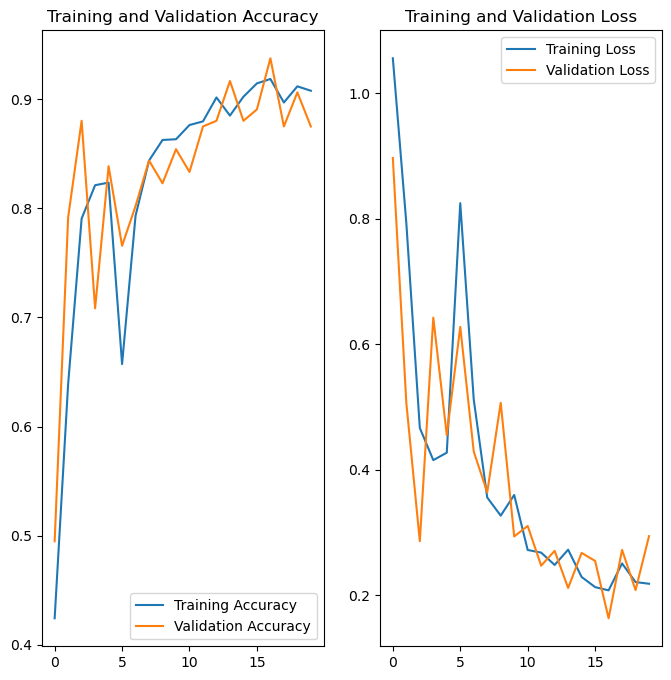

In [46]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_Late_blight
predicted label: Tomato_Late_blight


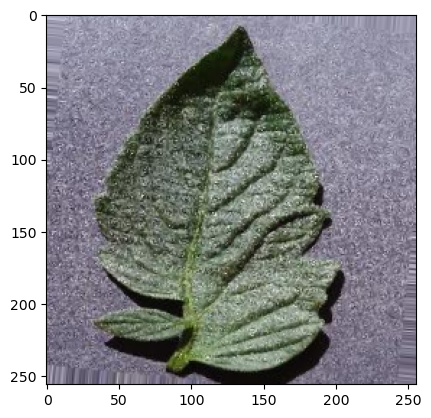

In [49]:
import numpy as np


for images_batch, labels_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [50]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

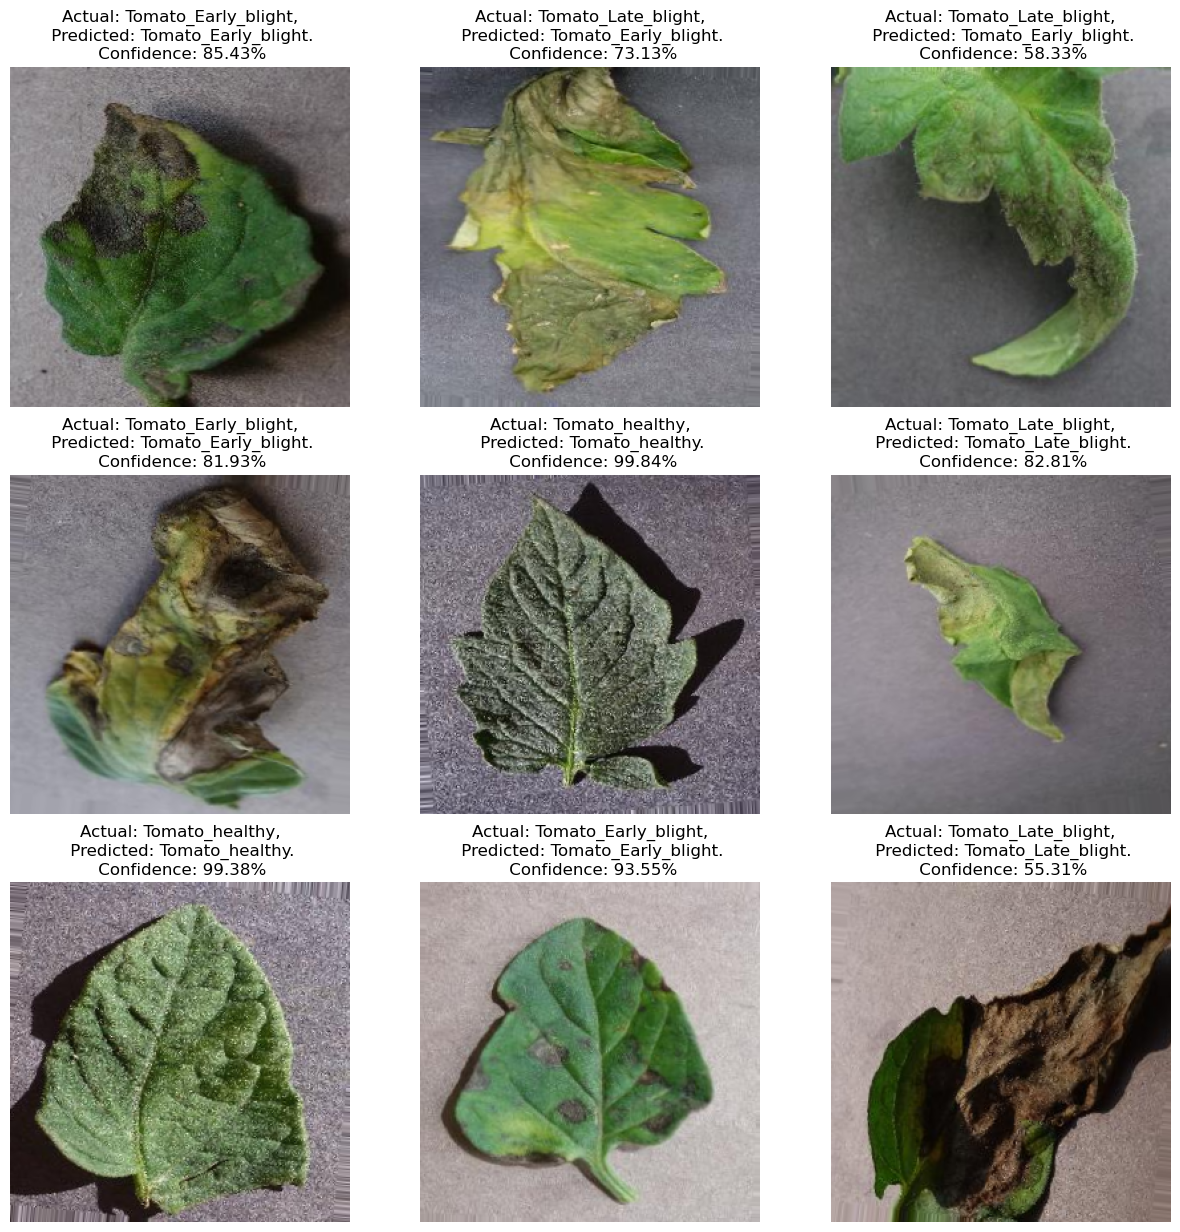

In [51]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [52]:
model.save("../tomatoes.h5")